In [9]:
pip install pycaret

y/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from pandas-profiling>=2.8.0->pycaret) (0.11.2)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install libomp

ERROR: Could not find a version that satisfies the requirement libomp (from versions: none)
ERROR: No matching distribution found for libomp
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [2]:
housing_data = pd.read_csv('housing.csv')
df = housing_data
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
# for the housing dataset https://towardsdatascience.com/how-to-use-pycaret-the-library-for-lazy-data-scientists-91343f960bd2
from pycaret.regression import *
reg_experiment = setup(housing_data, 
                       target = 'median_house_value', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')

In [21]:
best_model = compare_models()

In [22]:
lightgbm = create_model('lightgbm')

In [23]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

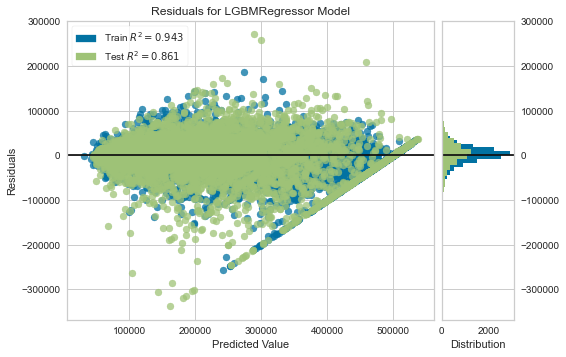

In [24]:
plot_model(tuned_lightgbm)

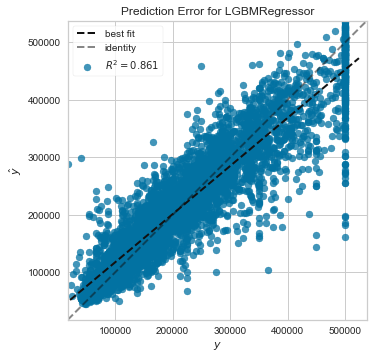

In [27]:
tuned = tuned_lightgbm
plot_model(tuned_lightgbm, plot = 'error')

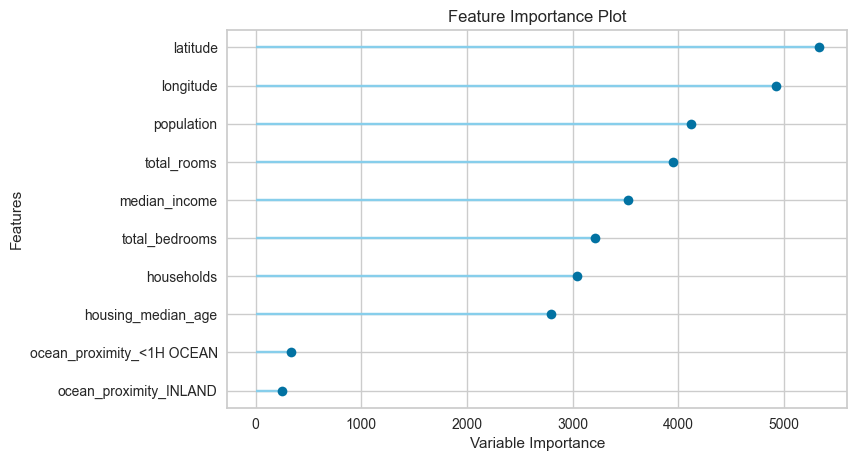

In [28]:
plot_model(tuned, plot = 'feature')

In [31]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
interpret_model(tuned)

In [ ]:
# automate the model
automl_model = automl(optimize = 'MAE')

In [ ]:
print(automl_model)

In [ ]:
# make predictions
pred_holdouts = predict_model(automl_model)
pred_holdouts.head()

In [ ]:
# Save the loaded model
loaded_model = load_model('automl-model')
print(loaded_model)

In [ ]:
# save model into pickle format
save_model(automl_model, model_name='automl-model')

In [ ]:
# make predictions on entire dataset
new_data = housing_data.copy()
new_data.drop(['median_house_value'], axis=1, inplace=True)
predictions = predict_model(automl_model, data=new_data)
predictions.head()

In [19]:
# For the diabetes dataset
# https://towardsdatascience.com/pycaret-better-machine-learning-with-python-58b202806d1e
from pycaret.classification import * 
from pycaret.datasets import get_data